# Lab-Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instructions
## Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

## Load the customer_value_analysis.csv into the variable customer_df.
## First look at its main features (head, shape, info).

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [5]:

cols = []
for colname in customer_df.columns:
    cols.append(colname.lower().replace(' ','_'))

customer_df.columns = cols

display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Change the type of effective_to_date column to DateTime format.

In [6]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])

In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

## Check NaN values per column.

In [8]:
#Check NaN values per column.
customer_df.isnull().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

## Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.


In [9]:
def df_by_category(df):
    numerical_df = df.select_dtypes(np.number)
    categorical_df = df.select_dtypes(object)
    return categorical_df, numerical_df

categorical_df, numerical_df = df_by_category(customer_df)

In [10]:
#df_by_category(customer_df)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## Drop any ID column.

In [12]:
categorical_df = categorical_df.drop(['customer'], axis=1)

## Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [13]:
correlations_matrix = numerical_df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


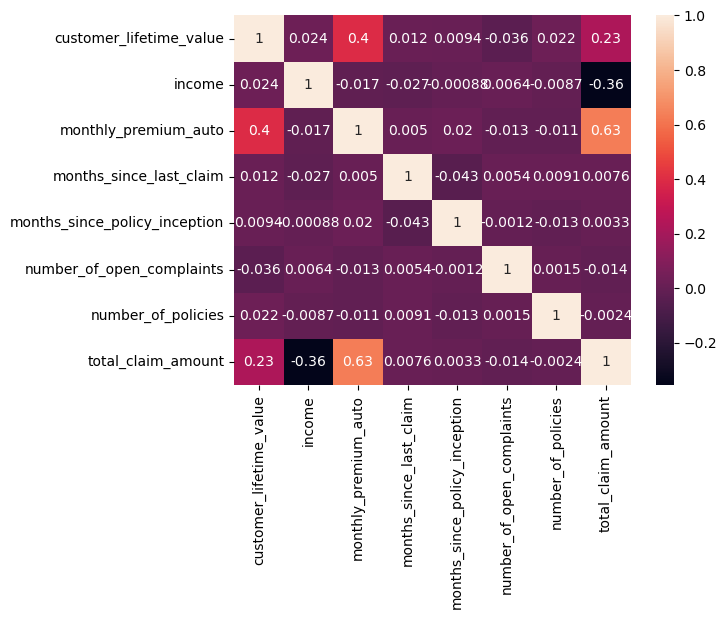

In [14]:
sns.heatmap(correlations_matrix, annot=True)#, mask= )#displya actual corellation value
plt.show()

total_claim_amount, monthly_premium_auto have higherCorrelation. Higher the monthly premium auto, higher the total claim amount. It makes sense

## Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [15]:

def numerical_type(df):

    col_name_dis=[]
    col_name_con=[]
    for col in df:
        if df[col].nunique() > 36:
            col_name_con.append(col)
        else:
            col_name_dis.append(col)
    discrete_df = df.loc[:,col_name_dis]
    continuous_df = df.loc[:,col_name_con]
    return discrete_df, continuous_df 

    
discrete_df, continuous_df = numerical_type(numerical_df)

continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [16]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [17]:
print(continuous_df.shape, discrete_df.shape)

(9134, 5) (9134, 3)


## Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [18]:
def bar_plot(df):  
    col_names = list(df.select_dtypes(np.number))
    plt_size = len(col_names)
    n = 0
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    n = 0
    for i in col_names:
        sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), ax = ax[n])
        ax[n].set(xlabel = i, ylabel='Count')
        n += 1
    plt.show()

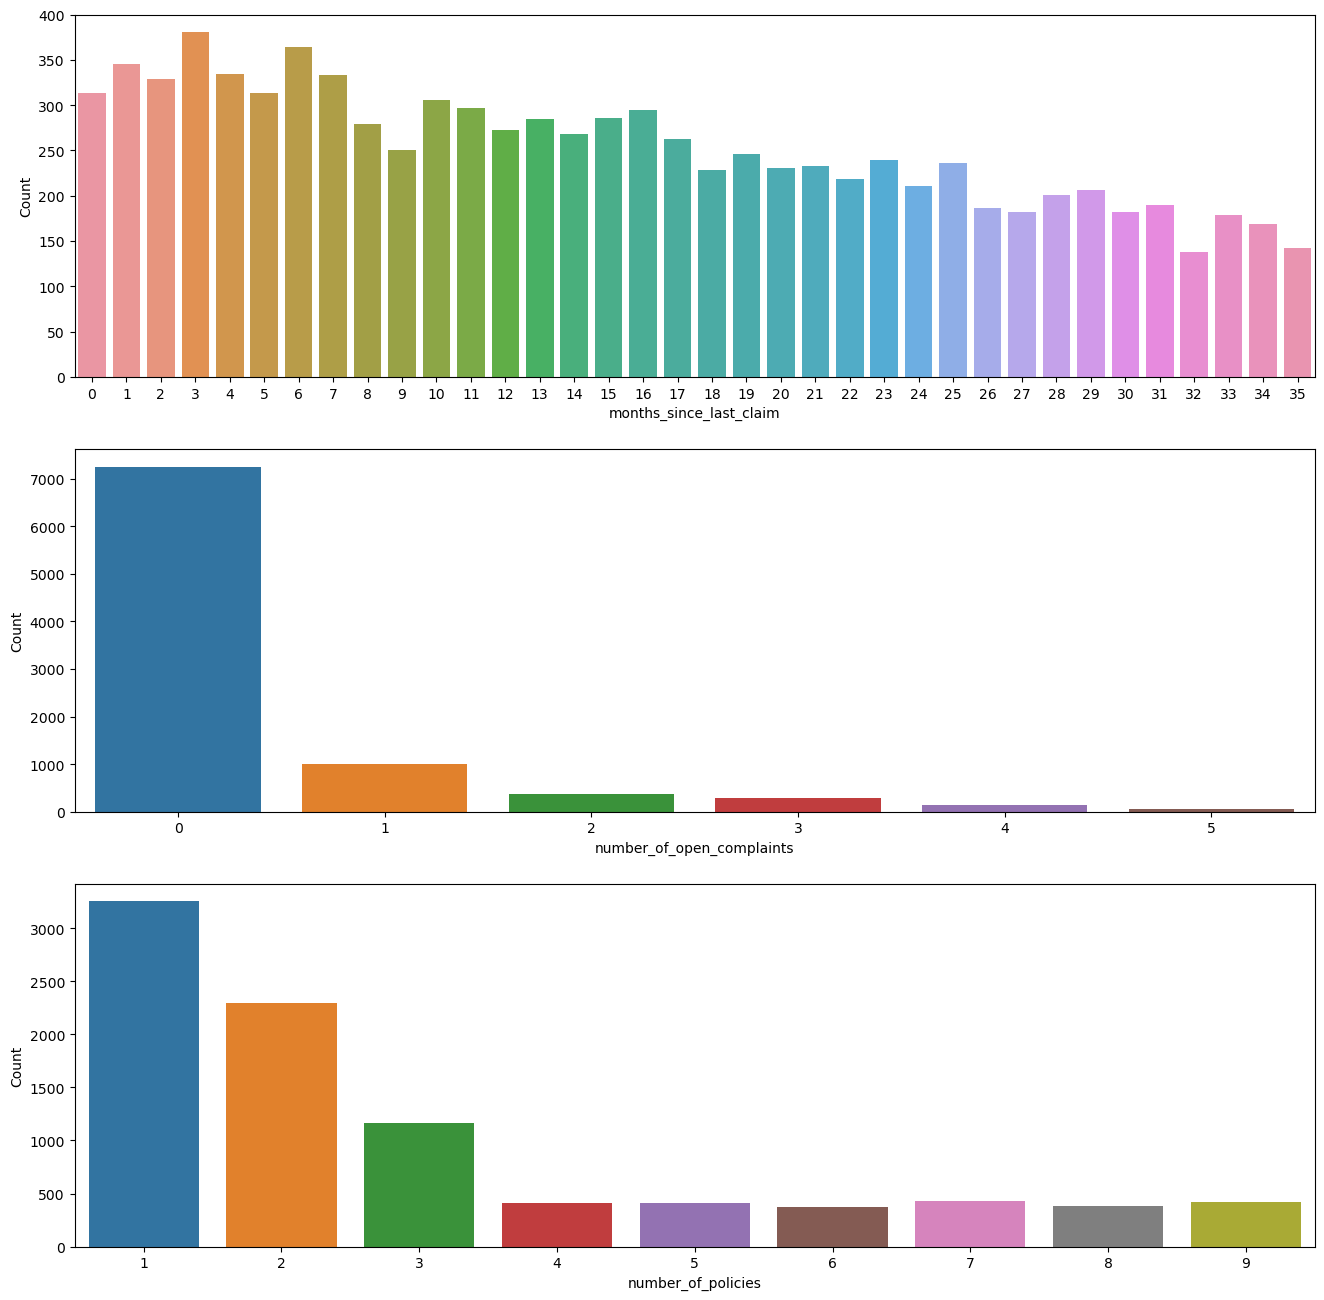

In [19]:
bar_plot(discrete_df)

## Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)


In [20]:
def plot_histogram(df):
   
    col_names = list(df.select_dtypes(np.number))
    plt_size = len(col_names)
    n = 0
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    
    for i in col_names:
        sns.histplot(data = df[i], ax = ax[n], color='#ce42f5')
        n += 1
    plt.show()

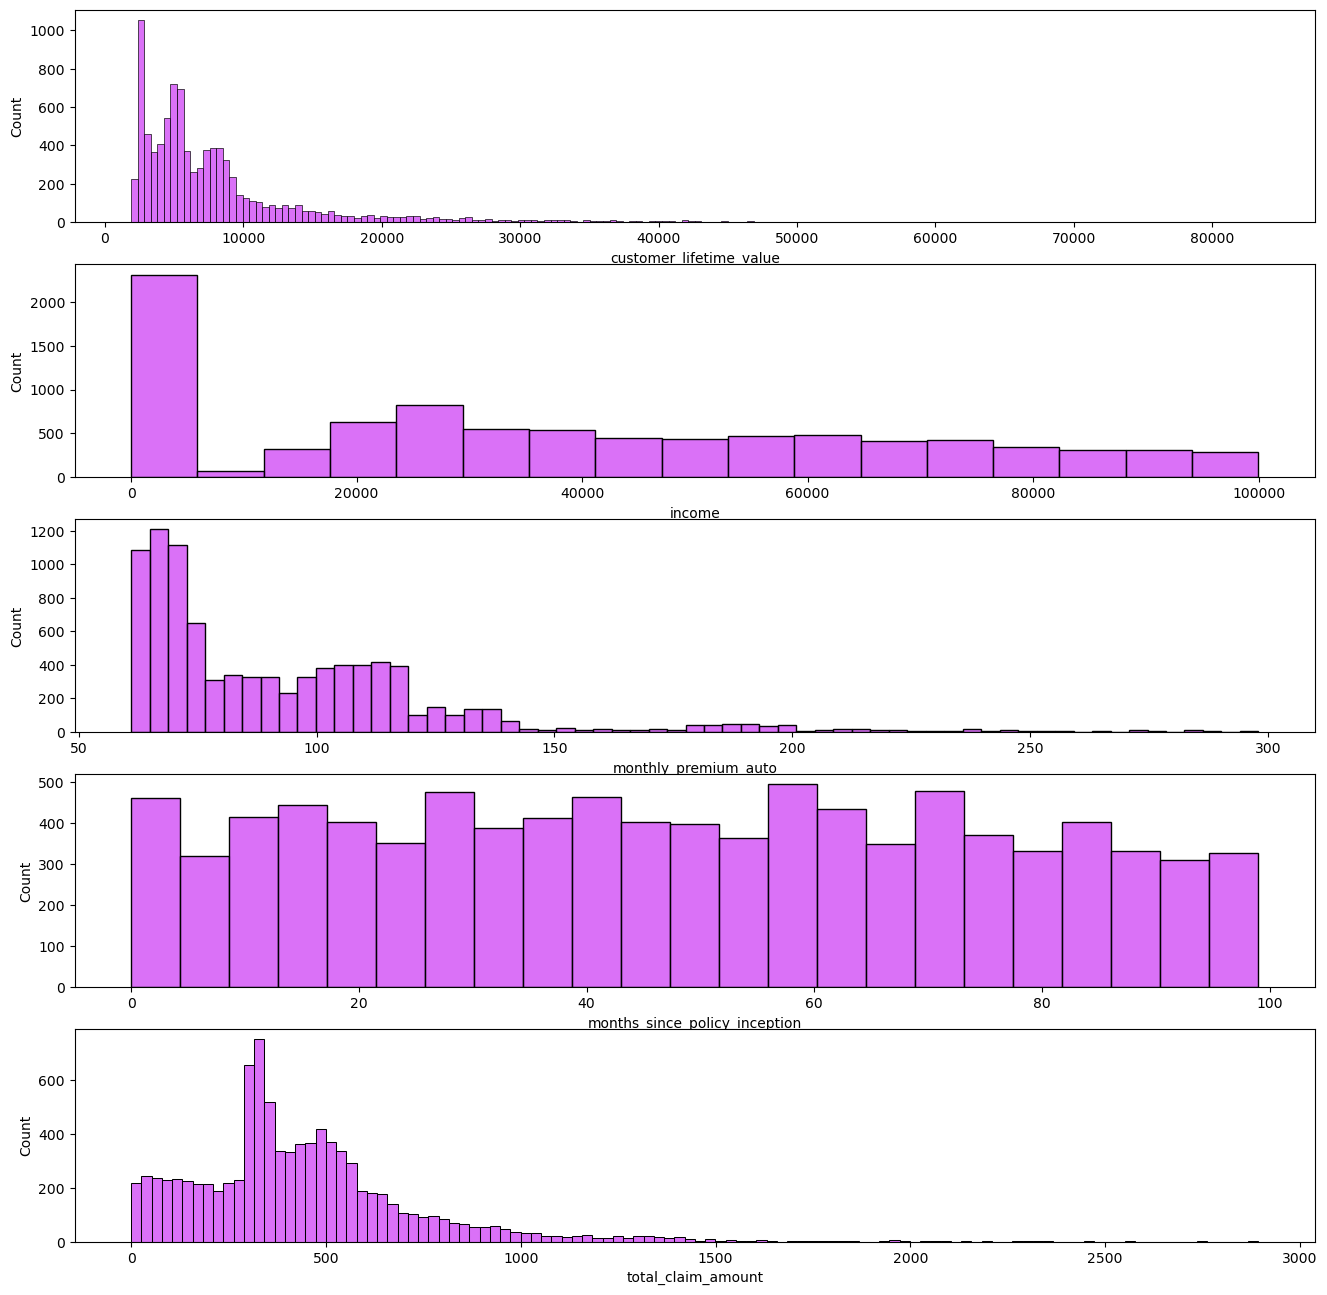

In [21]:
plot_histogram(continuous_df)

## According to the previous histogram plots, do you think that you will have to apply any transformation?



<h4 style="color:Tomato">It looks like data distribution is Skewed</h4>

## Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [22]:
def boxplot_plt(df):
        
    col_names = list(df.select_dtypes(np.number))
    plt_size = len(col_names) 
    n = 0
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    
    for i in col_names:
        sns.boxplot(data = df[i], orient = 'h', ax = ax[n], color='#63e6a8')
        n += 1
    plt.show()

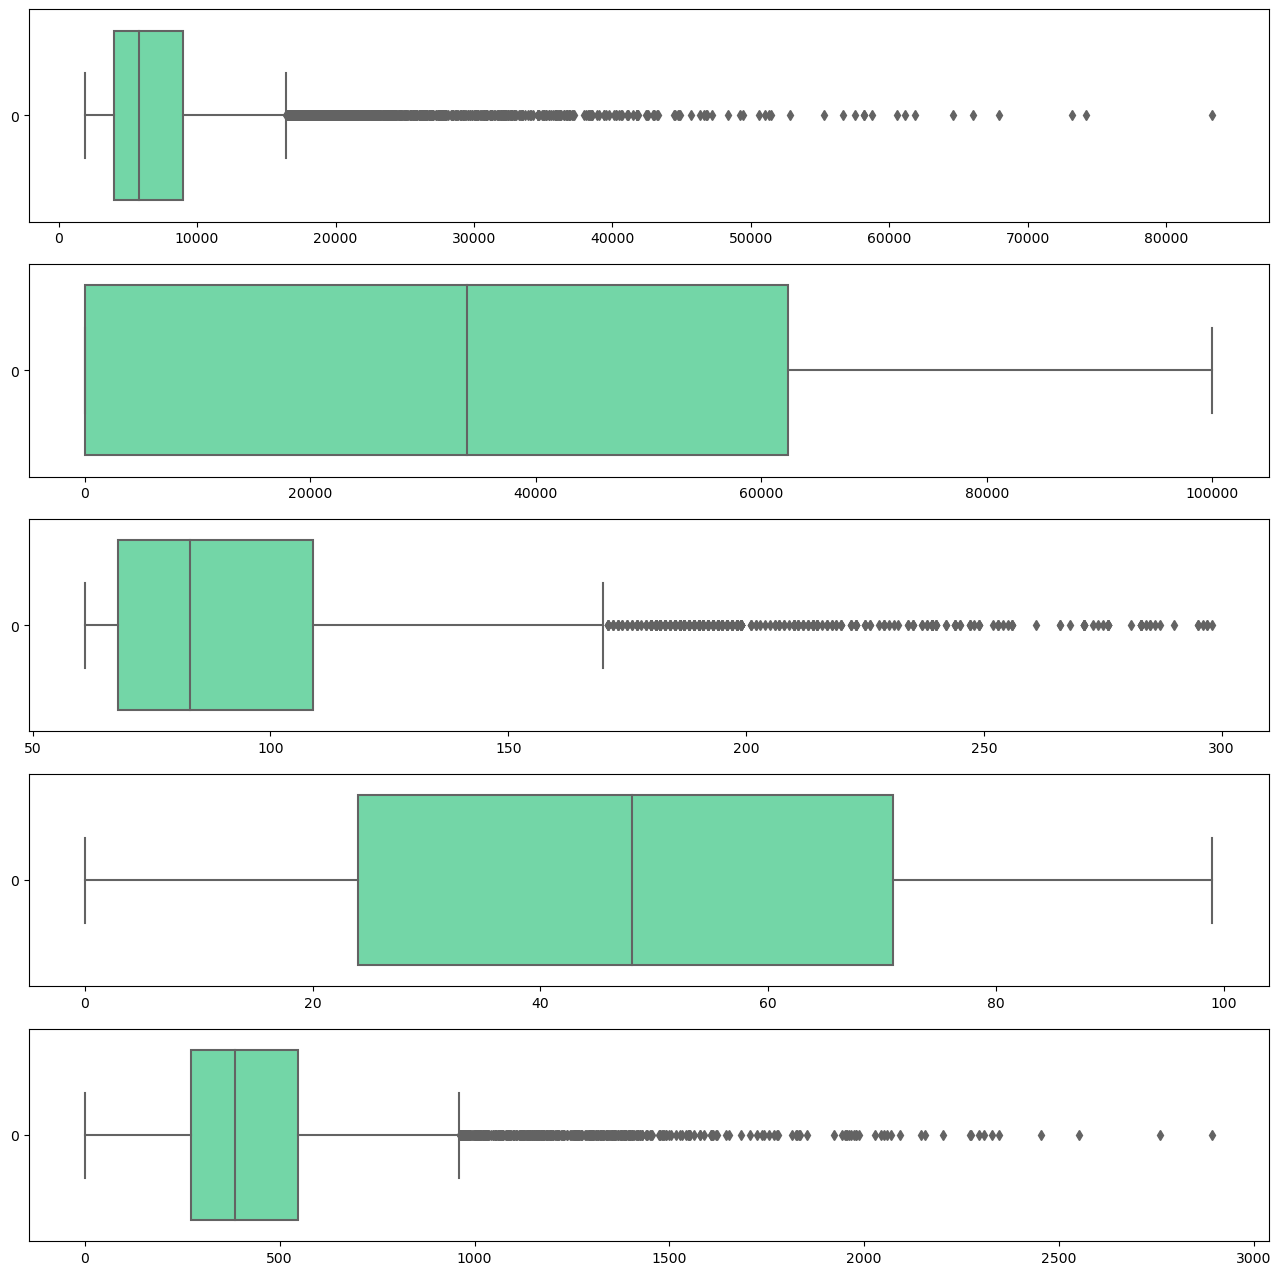

In [23]:
boxplot_plt(continuous_df)

# Lab | Cleaning categorical data


For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Special instructions
As in this lab, we will keep working on the same dataset as the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named Lab Cleaning Categorical Data. Then restart the Kernel and run all the previous cells. Finally, keep working on the same notebook according to the next instructions.



### Instructions




### Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

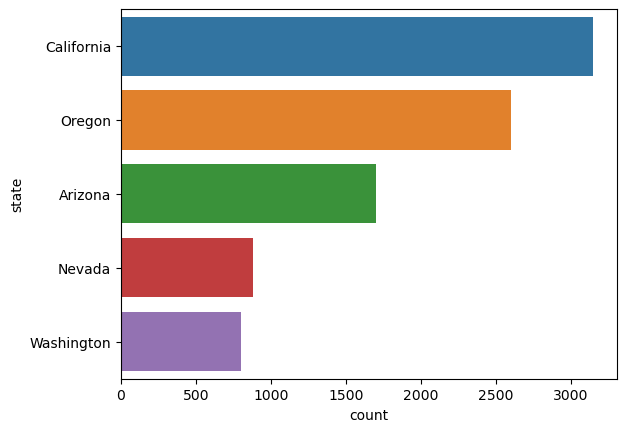

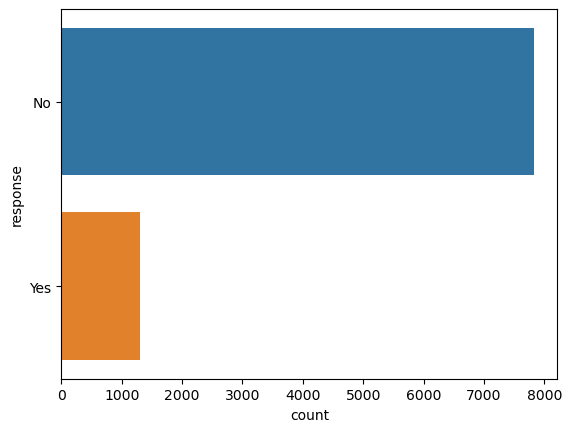

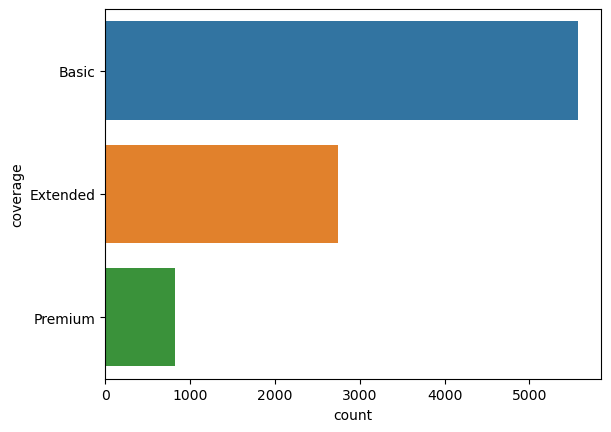

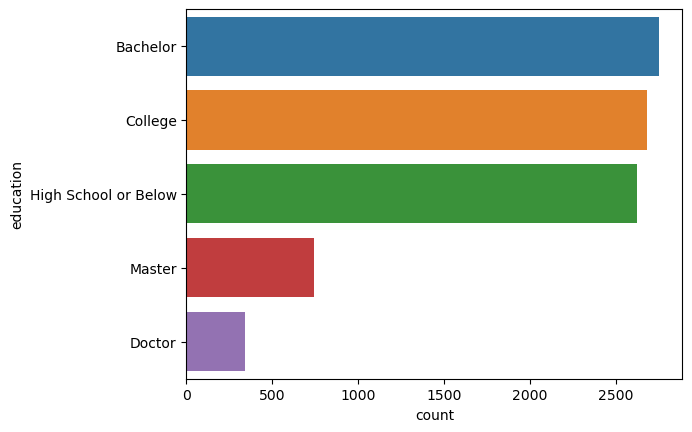

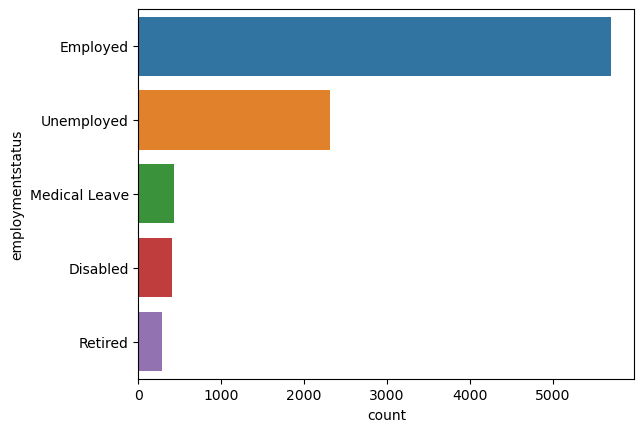

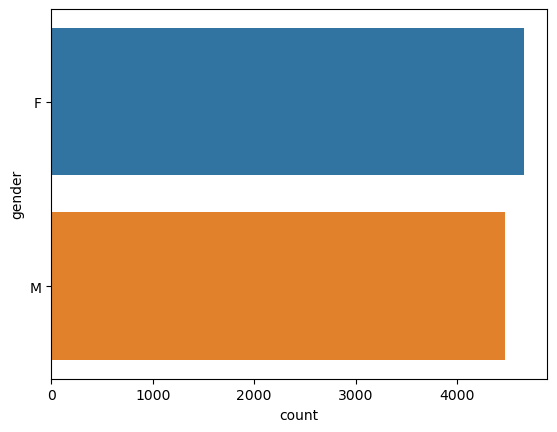

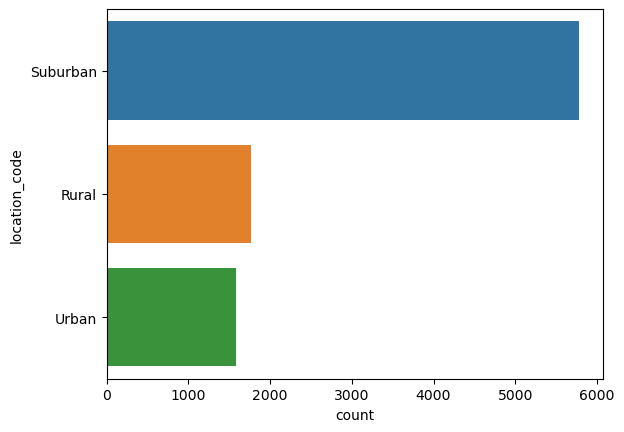

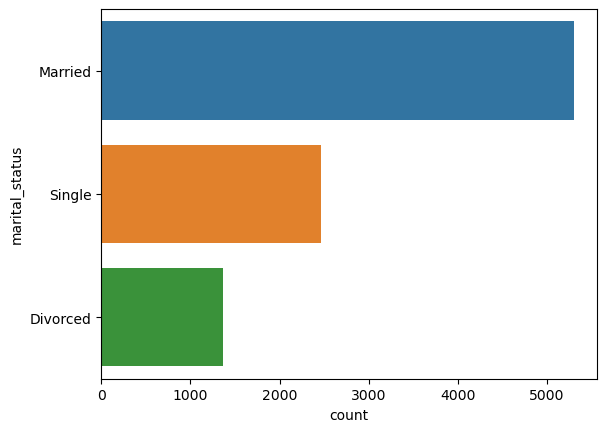

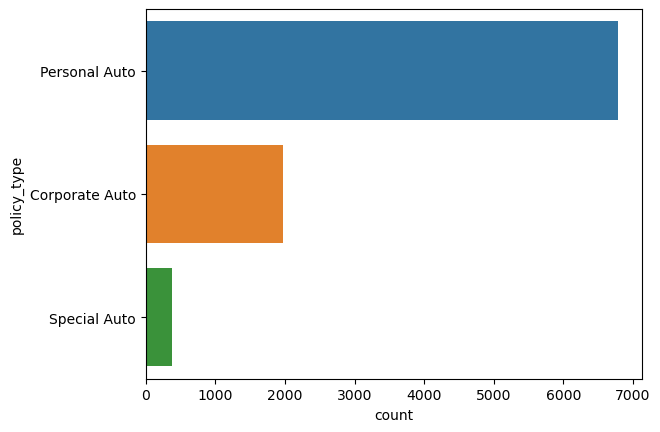

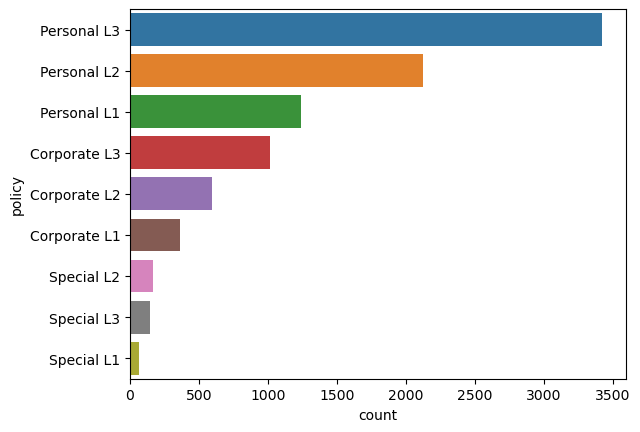

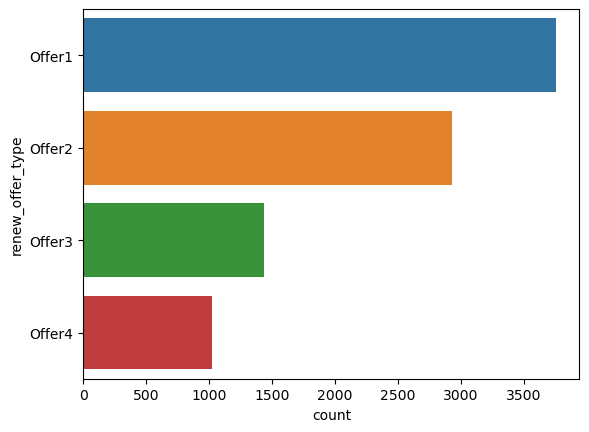

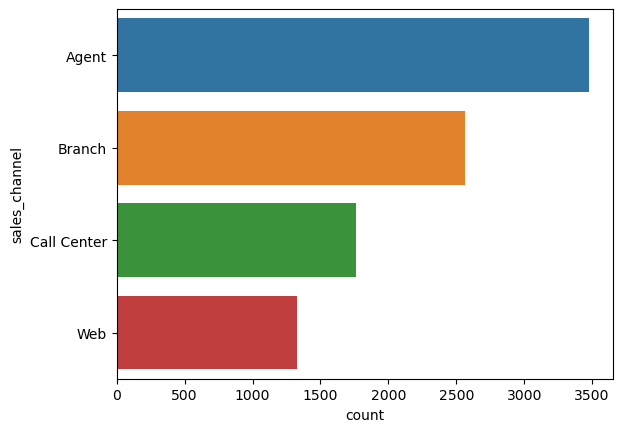

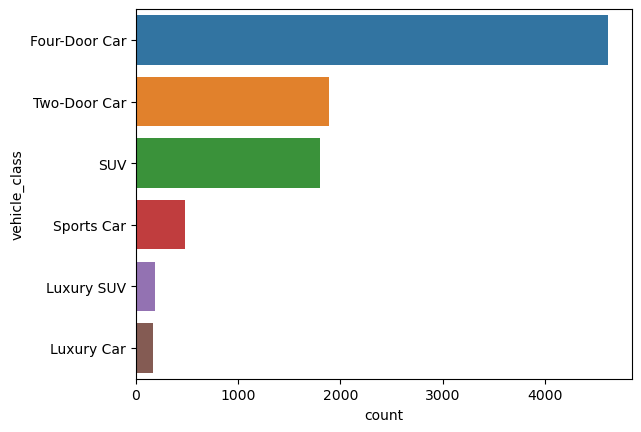

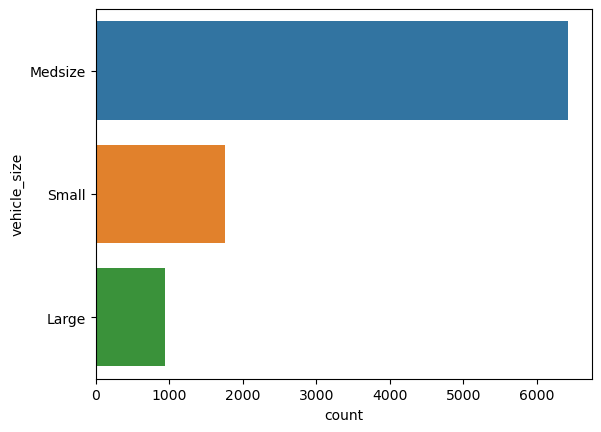

In [24]:
def plot_countplot(df):
    for col in df:
        sns.countplot(data=df, y=col, order= df[col].value_counts(dropna=False).index)
        plt.show()
    
plot_countplot(categorical_df)

### policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [25]:
categorical_df = categorical_df.drop(['policy_type'],axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [26]:
categorical_df['policy'].unique() 

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [27]:
def policy_transform(policy):
    
    if policy in ['Corporate L1', 'Personal L1', 'Special L1']:
        return "L1"
    elif policy in ['Corporate L2', 'Personal L2', 'Special L2']:
        return "L2"
    else:
        return "L3"

categorical_df['policy'] = categorical_df['policy'].apply(policy_transform)

In [28]:
categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

In [29]:
categorical_df.shape

(9134, 13)

In [30]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


### Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

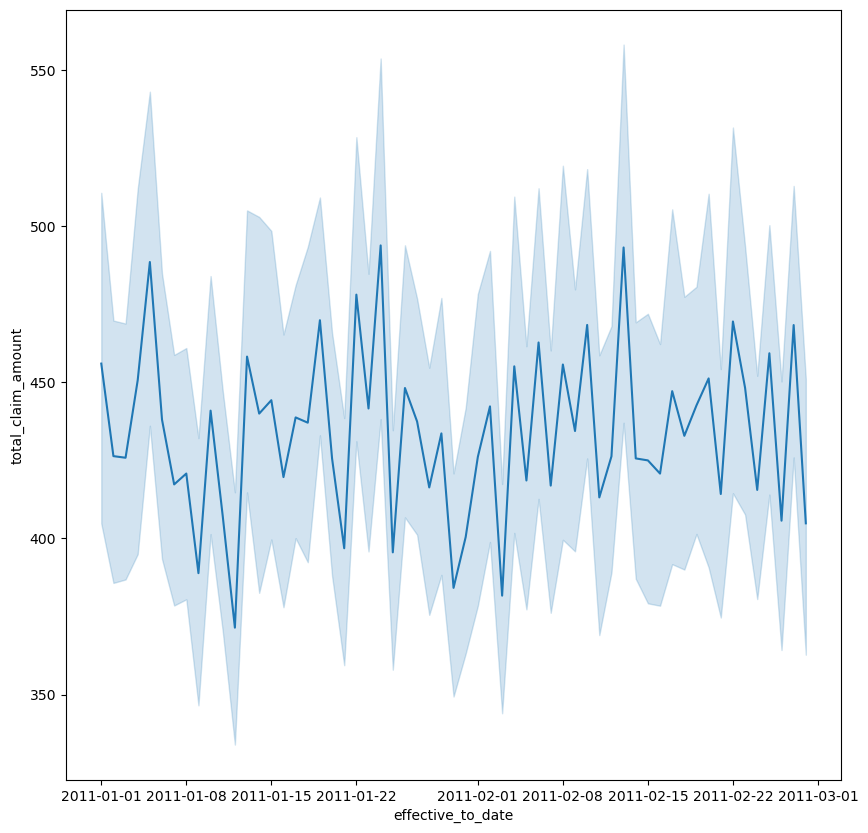

In [31]:
fig = plt.subplots(figsize=(10,10))
sns.lineplot(data=customer_df, x=(customer_df['effective_to_date']), y=(customer_df['total_claim_amount']))
plt.show()

### To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date

day_name with the day NAME of effective_to_date

week with the week of effective_to_date

month with the month NAME of effective_to_date

total_claim_amount with total_claim_amount

In [32]:
date_claim_amount=pd.DataFrame
date_claim_amount=customer_df.loc[:,['total_claim_amount','effective_to_date']]
date_claim_amount

,total_claim_amount,effective_to_date
0,384.811147,2011-02-24
1,1131.464935,2011-01-31
2,566.472247,2011-02-19
3,529.881344,2011-01-20
4,138.130879,2011-02-03
...,...,...
9129,198.234764,2011-02-10
9130,379.200000,2011-02-12
9131,790.784983,2011-02-06
9132,691.200000,2011-02-03


In [39]:
def time_change(df_col):
    dt_df = pd.DataFrame()
    dt_df['day'] = df_col.dt.dayofyear
    dt_df['day_name'] = df_col.dt.day_name()
    dt_df['week'] = df_col.dt.isocalendar().week
    dt_df['month'] = df_col.dt.month_name()
    return dt_df

In [40]:
customer_df_date = time_change(customer_df['effective_to_date'])

In [41]:
customer_df_date['total_claim_amount'] = customer_df['total_claim_amount']

In [42]:
customer_df_date

,day,day_name,week,month,total_claim_amount
0,55,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,50,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,34,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,41,Thursday,6,February,198.234764
9130,43,Saturday,6,February,379.200000
9131,37,Sunday,5,February,790.784983
9132,34,Thursday,5,February,691.200000


### Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [51]:
sum_agg_gr = customer_df_date.groupby(['day_name']).agg({'total_claim_amount':lambda x: np.round(np.sum(x), 2)})
sum_agg_gr = sum_agg_gr.reindex(index=('Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday','Sunday'))
sum_agg_gr

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


### Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

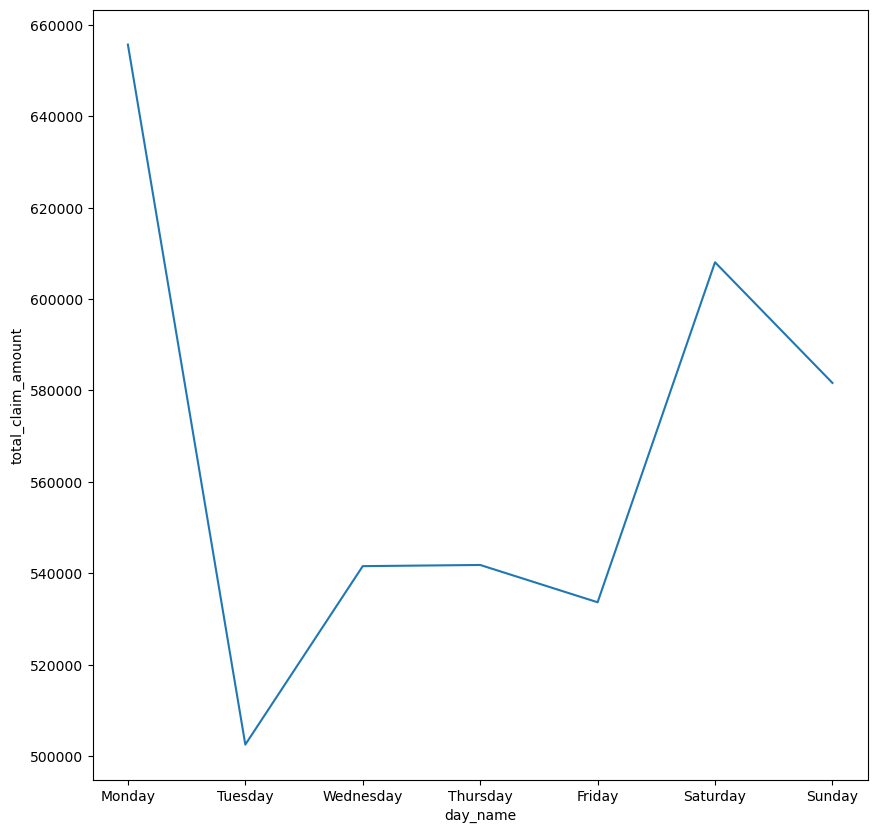

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = sum_agg_gr, x = 'day_name', y = 'total_claim_amount', ax=ax)

### Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [47]:
customer_df_date.groupby('day_name').agg({'total_claim_amount':
                                          'count'}).reindex(index=['Monday',
                                                                 'Tuesday',
                                                                 'Wednesday',
                                                                 'Thursday',
                                                                 'Friday',
                                                                 'Saturday',
                                                                 'Sunday'])

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


###  Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [48]:
median_gr = sum_agg_gr.groupby(['day_name']).agg({'total_claim_amount':'median'}).round(2)
median_gr = median_gr.sort_values(by='total_claim_amount',ascending=False).reset_index()
median_gr

,day_name,total_claim_amount
0,Monday,655689.71
1,Saturday,608060.10
2,Sunday,581655.66
3,Thursday,541820.80
4,Wednesday,541563.05
5,Friday,533658.79
6,Tuesday,502518.93


### Plot the median "target" by day of the week name using a seaborn barplot

<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

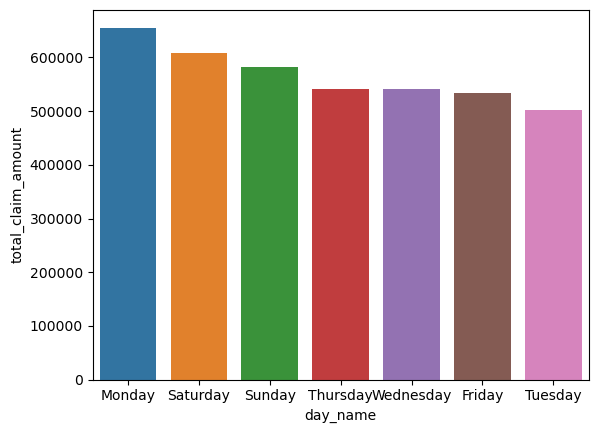

In [49]:
sns.barplot(data = median_gr, x='day_name', y='total_claim_amount')

### What can you conclude from this analysis?

### Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [56]:
customer_df_date['month'].unique()

array(['February', 'January'], dtype=object)

In [57]:
customer_df_date.groupby('month').agg({'total_claim_amount':
                                       'sum'}).round(2).reindex(index={'January','February'})

,total_claim_amount
month,
January,2117142.86
February,1847824.19


### Can you do a monthly analysis given the output of the previous series? Why?

Data available is only of January and February. Thants why answer is no.

### Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [63]:
def outlier_remover(df):
    df1 = df.copy()
    thr=3
    to_remove = []
    for col in df1.columns:
        sd_min = np.mean(df1[col]) - (thr*(df1[col].std()))
        sd_max = np.mean(df1[col]) + (thr*(df1[col].std()))
        out = df1[(df1[col] < sd_min)|(df1[col] > sd_max)]
        to_remove += list(out.index)
    df1 = df1.drop(to_remove)
    df1 = df1.reset_index(drop=True)
    return df1

### Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [64]:
print(continuous_df.shape)
continuous_clean_df = outlier_remover(continuous_df)
continuous_clean_df

(9134, 5)


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
8665,23405.987980,71941,73,89,198.234764
8666,3096.511217,21604,79,28,379.200000
8667,8163.890428,0,85,37,790.784983
8668,7524.442436,21941,96,3,691.200000


### Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [70]:
concat_df = pd.concat([categorical_df, customer_df['effective_to_date'], discrete_df, continuous_clean_df], axis = 1)
concat_df = concat_df.dropna().reset_index(drop=True)
concat_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,vehicle_size,effective_to_date,months_since_last_claim,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,Medsize,2011-02-24,32,0,1,2763.519279,56274.0,69.0,5.0,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,...,Medsize,2011-01-31,13,0,8,6979.535903,0.0,94.0,42.0,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,Medsize,2011-02-19,18,0,2,12887.431650,48767.0,108.0,38.0,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,Medsize,2011-01-20,18,0,7,7645.861827,0.0,106.0,65.0,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,Medsize,2011-02-03,12,0,1,2813.692575,43836.0,73.0,44.0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,California,No,Basic,College,Medical Leave,M,Suburban,Married,L2,Offer1,...,Medsize,2011-01-14,21,1,6,23405.987980,71941.0,73.0,89.0,198.234764
8666,California,No,Basic,Master,Medical Leave,F,Rural,Married,L2,Offer2,...,Medsize,2011-01-26,25,0,1,3096.511217,21604.0,79.0,28.0,379.200000
8667,California,No,Extended,High School or Below,Unemployed,M,Suburban,Single,L3,Offer2,...,Small,2011-02-11,23,0,1,8163.890428,0.0,85.0,37.0,790.784983
8668,California,No,Basic,High School or Below,Unemployed,M,Suburban,Single,L2,Offer3,...,Medsize,2011-01-05,11,0,6,7524.442436,21941.0,96.0,3.0,691.200000


### Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [71]:
concat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,vehicle_size,effective_to_date,months_since_last_claim,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,Medsize,2011-02-24,32,0,1,2763.519279,56274.0,69.0,5.0,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,...,Medsize,2011-01-31,13,0,8,6979.535903,0.0,94.0,42.0,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,Medsize,2011-02-19,18,0,2,12887.431650,48767.0,108.0,38.0,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,Medsize,2011-01-20,18,0,7,7645.861827,0.0,106.0,65.0,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,Medsize,2011-02-03,12,0,1,2813.692575,43836.0,73.0,44.0,138.130879


### Turn the response column values into (Yes=1/No=0).

In [72]:
concat_df['response'] = concat_df['response'].replace({'Yes':1, 'No':0})
concat_df['response'].unique()

array([0, 1], dtype=int64)

### Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [73]:
concat_df['education'] = concat_df['education'].replace(("Master","Doctor"), "Graduate")
concat_df['education'].value_counts()

Bachelor                2611
College                 2541
High School or Below    2502
Graduate                1016
Name: education, dtype: int64

### Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [74]:
concat_df['employmentstatus'] = concat_df['employmentstatus'].replace(("Medical Leave", "Disabled", "Retired"), "Inactive")
concat_df['employmentstatus'].value_counts()

Employed      5421
Unemployed    2185
Inactive      1064
Name: employmentstatus, dtype: int64

### Deal with column Gender turning the values into (1/0).

In [76]:
concat_df['gender'] = concat_df['gender'].replace({'F':1, 'M':0})
concat_df['gender'].unique()

array([1, 0], dtype=int64)

### Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [77]:

concat_df.vehicle_class = concat_df.vehicle_class.apply(
    lambda x: 'Luxury' if x in ('Sports Car','Luxury SUV','Luxury Car') else x)

In [78]:
concat_df.vehicle_class.value_counts()

Four-Door Car    4398
Two-Door Car     1789
SUV              1689
Luxury            794
Name: vehicle_class, dtype: int64

### Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [80]:
concat_df.coverage = concat_df.coverage.apply(lambda x: 2 if x in 'Premium' else ( 1 if x in 'Extended' else 0))

In [81]:
concat_df.coverage.value_counts()

0    5285
1    2610
2     775
Name: coverage, dtype: int64

### Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [83]:
concat_df.employmentstatus = concat_df.employmentstatus.apply(lambda x: 2 if x in 'Employed' else ( 1 if x in 'Inactive' else 0))
concat_df.employmentstatus.value_counts()

2    5421
0    2185
1    1064
Name: employmentstatus, dtype: int64

### Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [86]:
concat_df.location_code = concat_df.location_code.apply(lambda x: 0 if x in 'Urban' else ( 1 if x in 'Suburban' else 2))
concat_df.location_code.value_counts()

1    5466
2    1694
0    1510
Name: location_code, dtype: int64

### Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [87]:
concat_df.vehicle_size = concat_df.vehicle_size.apply(lambda x: 0 if x in 'Large' else ( 1 if x in 'Medsize' else 2))
concat_df.vehicle_size.value_counts()

1    6092
2    1679
0     899
Name: vehicle_size, dtype: int64

### Get a dataframe with the categorical nominal columns

In [90]:
cat_nominal = concat_df.select_dtypes(object)
cat_nominal

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...
8665,California,College,Married,L2,Offer1,Web,Four-Door Car
8666,California,Graduate,Married,L2,Offer2,Branch,Four-Door Car
8667,California,High School or Below,Single,L3,Offer2,Call Center,Two-Door Car
8668,California,High School or Below,Single,L2,Offer3,Agent,Four-Door Car


### Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [91]:
labels=[]

for col in cat_nominal.columns:
    labels.append(list(cat_nominal[col].unique()))

print(labels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], ['Bachelor', 'College', 'Graduate', 'High School or Below'], ['Married', 'Single', 'Divorced'], ['L3', 'L2', 'L1'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]


### Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [96]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = labels)

data_encode = encoder.fit_transform(cat_nominal).toarray()

data_encode = pd.DataFrame(data_encode, columns = encoder.get_feature_names_out())
data_encode

,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,policy_L1,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8666,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8668,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
#or
pd.get_dummies(cat_nominal, drop_first=True)

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Graduate,education_High School or Below,marital_status_Married,marital_status_Single,policy_L2,policy_L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
8666,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0
8667,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1
8668,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0
